<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Summary-&amp;-Questions" data-toc-modified-id="Summary-&amp;-Questions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary &amp; Questions</a></span><ul class="toc-item"><li><span><a href="#Available-Sample-size" data-toc-modified-id="Available-Sample-size-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Available Sample size</a></span></li><li><span><a href="#Further-research-questions" data-toc-modified-id="Further-research-questions-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Further research questions</a></span></li></ul></li><li><span><a href="#Ogembo-Sample-Numbers" data-toc-modified-id="Ogembo-Sample-Numbers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ogembo Sample Numbers</a></span></li><li><span><a href="#Referral-Cases" data-toc-modified-id="Referral-Cases-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Referral Cases</a></span></li><li><span><a href="#HIVST-Kits-Required" data-toc-modified-id="HIVST-Kits-Required-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>HIVST Kits Required</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#All-KE-Data-and-By-Branch-Comparison" data-toc-modified-id="All-KE-Data-and-By-Branch-Comparison-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All KE Data and By Branch Comparison</a></span><ul class="toc-item"><li><span><a href="#Referrals---Nov-2018-Data" data-toc-modified-id="Referrals---Nov-2018-Data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Referrals - Nov 2018 Data</a></span></li></ul></li></ul></li></ul></div>

In [1]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
%run "../../zUtilz/LG_load_envz.ipynb"

ERROR:root:Cell magic `%%R` not found.


In [2]:
## Load dataset
AS_LAST_DATED = "Jan-2018" 

## Load Dataset - Ogembo Last 90 Days Dashboard for referral & treatment details 
ref_og_dt = pd.read_csv( "%s/LG/1803_assessment_WO_Oct2017-Jan2018.csv" % DATA_DIR)

TAG_LAST_DATED = "26-Mar-2018" 
## Load Dataset - Ogembo Last 90 Days Dashboard
dash_og_dt = pd.read_csv( "%s/LG/Ogembo_targeted_chv_support_ke-20180326.csv" % DATA_DIR)
dash_og_dt.drop("Phone Number", axis=1, inplace=True)


In [3]:
#ref_og_dt.shape
#ref_og_dt.info()

## 1. calculated fields 
ref_og_dt["health_problems"].fillna( "NO_Protocol", inplace=True)
ref_og_dt["Protocol_Supported"] = np.where( ref_og_dt["health_problems"] == "NO_Protocol", "Unsupported", "Supported")
ref_og_dt["Has_Referral"] = np.where( (ref_og_dt["assessmentoutcome"] == "Reffered only") 
                                                | (ref_og_dt["assessmentoutcome"] =="Treated and reffered"), 
                                     "Was Referred", "Was Not Referred")
ref_og_dt["Has_Treatment"] = np.where( ((ref_og_dt["assessmentoutcome"] == "treated only") 
                                                  | (ref_og_dt["assessmentoutcome"] =="Treated and reffered")), 
                                      "Was Treated", "Was Not Treated")

## drop some variables and codify supervisor names str.split(ref_og_dt["supervisor"], sep=" ")[0]
ref_og_dt["tmp_sup_name"] = ref_og_dt["supervisor"].apply( lambda x: x.split(sep=" ")[0])
ref_og_dt["supervisor"] = ref_og_dt["branch"]+"_"+ref_og_dt["tmp_sup_name"]

## 2. dummy data for the same
#ref_og_dt["Has_Treatment"].dummy



## 3.drop HQ branch - is a test branch or something 
ref_og_dt.drop( ref_og_dt[ref_og_dt["branch"]=="HQ"].index , inplace=True)
#ref_og_dt.shape

og_dt = ref_og_dt[ ref_og_dt["branch"]=="Ogembo"]
#og_dt.head(3) 

In [4]:
## Remove outliers
dash_og_dt.drop( dash_og_dt[ (dash_og_dt["Households Registered"] < 20) | (dash_og_dt["Households Registered"] >250) ].index, inplace=True)

## 1.Calculated Fields
dash_og_dt["Branch"]="Ogembo"
dash_og_dt["Hits_Sales_Target"]= np.where( dash_og_dt["Sales"] < SALES_TARGET, 0, 1)
#quintilize(og_dt, "Households Registered")

dash_og_dt["Total Assessments"] = dash_og_dt["Total U1 Assessments"] + dash_og_dt["Total U5 Assessments"] 
dash_og_dt["Total Treatments"] = dash_og_dt["Total U1 Treatments"] + dash_og_dt["Total U5 Treatments"] 
dash_og_dt["Total Referrals"] = dash_og_dt["On Time Referral f/u Treatment U5"] * dash_og_dt["Total U5 Assessments"] 


# Introduction 

A look into number of referral cases 
- Will inform sampling 

**Data Source & Limitations**
- Assessment outcome data for period Oct-2017 to Jan-2018. 
    - This data has number of assessments for the 4 month period Oct-2017 to Jan-2018 
    - This data identifies what was treated or referred or both. It also has records of assessments that don't have a supported health problem protocol in SmartHealth 


- CHW activity data for Mar 2018.
    - This has cummulatives as at 26-Mar-2018
    - This has additional information on the household numbers 


## Summary & Questions

These are some questions that are coming up from the data findings. 

### Available Sample size 

- The 6 CUs in Ogembo may have enough numbers for closed loop initiatives, if the two closed loop share the same control group.   
    - Ogembo had a total of 4,649 assessments recorded in Nov-2017. 
        - 693 of these got a referral. 
        - 2,363 households were served in that period. 
        
    - Busara indicated a sample of 34 CHWs per group if stretched to work within the 6 CUs (72 CHWs)
        - That could be about 700-800 records over a 4 month period, or around 175 - 200 referral records per month. 
    
    - Also see attached excel sheet for more details 
 




### Further research questions 
In terms of proportion, there's potentially less demand for referral activities. 

- **We treat more than we refer so do we have a real referral need within mother and child care?** There's potentially low demand/need for a comprehensive referral system within the mother and child care activities at the community level. Proper documentation and supervisory support within existing referral infrastructure may just do it for mother and child cases. Also, the few cases that require referral could be considered in the context of a larger emergencies and referral support structure. 

    - The pattern seems to be that generally CHW treat most of the cases they assess. 
        - The Kenya average is 87.9% of assessments get treated (12% don't get treated), and 
        - 15% of assessments get a referral (85% don't get a referral). 
        
    - Few of the cases the CHWs treat require referral 
        - Some assessments (2%) get both a referral and treatment.  
        - Only 2% of assessments did not relate to a protocol/workflow that is currently supported on SmartHealth. 
        
    - Few of the cases that CHWs attend to are not in the supported work flows. However, we need **more follow-up/baseline sense of what CHWs tend to do with cases outside mother and child**  
        - Only 2% of assessments did not related to a protocol/workflow that is currently supported on SmartHealth. 

    - Qualitative findings from design trip suggest that referrals are also given as a "prescription note" when clients cannot pay for the treatment the CHW is providing. 
        - This additionally reduces the number of cases that actually do need referral for treatment.
        
    - Our lit review cites a "three delays" framework for maternal health, which identifies three delays that are key barriers to reducing maternal mortality: 1). delays in decision to seek care 2). delays in getting to health facility and 3). delays in provision of adequate care
        - Current view of closing the loop is around linkage to health facility for additional care. This woul tackle 1 and 2 above. 
            - Field findings suggested that cost of access to care is potentially the key driver to delayed access to care and to delayed decision to act on seeking care. 
            - Also, found that care for adults was not as prioritized as care for the child (u5); more likely to act on children referrals. 
    
    - Need **more info on what ails most referral systems**. Also, why do most clients want to go several levels up; why don't they trust or use the health facilities in their locality?  
        - How to approach if it is a structural problem?
        - How to build more trust and participation at link facilities? 




- **Should we expand assessment scope to more than just mother and child?** From, the above, therefore, we wonder if there are cases outside our operating boundaries that potentially drive referral activity. We also consider what additional behavioural support is necessary.  
    - If there are, should we agree to deliberately expand initiative care activities to anybody and anything? 
        - This would require programming for general care and more review on how the national guidelines enable us to effectively test the referral system. 
        - On-going lit review would help us understand the scope for referral need in mother and child care delivery and what is driving that need. If structural issues are the reason, what should we do next? 
     
     - This also affects **sample size questions**. 
        - Should we expand catchment to get good sample size anyways OR do nothing because the challenge is with scope of referral demand (or what we want to evaluate as a result) and not size of selected study population. 
        
        - **Can we create demand within existing activities**?
            - Should we say "don't treat" in the treatment group? 
            - Depending on what we learn about how CHWs deal with unsupported cases
                - Is it a documentation problem? Should we record more to capture the numbers 
                - Is it a training and messaging problem? Should we train and senstive CHWs to capture all possible referral cases
                - Is it a motivation driven compliance problem? Should we have a suporting incentive to ensure that CHWs do capture all cases that require referral AND/OR that all CHWs are active? 



-  



## Ogembo Sample Numbers


- **Available CHWs and HHs:** For the period Oct-2017 to Jan-2018 assessment data, Ogembo has 69 active CHWs with a total 2,263 households attended to in that period, which is about 11,315 individuals if average household size is 5

    - As at 26-March last 90 days dashboard data 
        - 72 active CHWs, with a total of 7344 households, whish is about 528,768 individuals if average household size is 5. However, 2016 national data from NACC estimates Kisii population at 1,317,407. Therefore, TODO: check definition and calaculation of that households registered variable.  
        
        - May be a CHW can service about 23 % of their registered households in one period. So, running the pilot for 6 months would give us access to about 1701 to 3402 households tops (the 3402 would assume that unique visits are made in each period). 


- **Expansion Activities:** The expected LG population in Ogembo is about 170 CHWs as per proposal. Planned expansion is for 90 more CHWs, which would mean a total of 72+90 = 162 CHWs or 12,960 to 16,200 households
    - Recruitment for another cohort is scheduled for April 2018 (30) and then another 60 in Q4. 



- **CU Size: ** A CU has about xx CHWs


**TODO**
- Get CU mappings
- Get expansion numbers 

In [5]:
print("\n\n1. Number of CHPs and Households with Activity as at %s" % TAG_LAST_DATED)
pd.pivot_table( dash_og_dt, index=["Branch"], 
               values=["Households Registered", "CHP ID"], 
               aggfunc={ "Households Registered": np.sum, "CHP ID":zCountUnique },  
                        margins=True )


print("\n\n2. Number of CHPs and Households with Activity for period Oct-2017 to Jan-2018" )
pd.pivot_table( og_dt[ og_dt["branch"]=="Ogembo"], index=["branch",], 
               values=["supervisor","chpid", "patient_id"], 
               aggfunc=zCountUnique,  margins=True ) 



1. Number of CHPs and Households with Activity as at 26-Mar-2018


,CHP ID,Households Registered
Branch,,
Ogembo,72.0,7344.0
All,72.0,7344.0




2. Number of CHPs and Households with Activity for period Oct-2017 to Jan-2018


,chpid,patient_id,supervisor
branch,,,
Ogembo,69.0,2263.0,6.0
All,69.0,2263.0,6.0


In [6]:
print("\n\n3. Busara n per group For a sufficiently powered research within the 6 CUs constraint ")

pd.DataFrame({
    "# Treatment Groups including Control": [2,3],
    "# CHV From Busara" : [22, 34],
    "Estimated # Referral Records per Group": [ 732/2, 732/3 ], 
    "Notes" : [ "", "Better fit b/c control + closed loop existing + closed loop HIVST"]
}
).round( 0 )



3. Busara n per group For a sufficiently powered research within the 6 CUs constraint 


,# CHV From Busara,# Treatment Groups including Control,Estimated # Referral Records per Group,Notes
0,22,2,366.0,
1,34,3,244.0,Better fit b/c control + closed loop existing ...


## Referral Cases

- **Most of the cases assessed are treated at the community. ** 
    - 90% of assessments were treated (10% were not treated). 
    - Cases that are not currently supported in SmartHealth protocols do not get treated. 


- **Most of the referrals are for supported protocol - 16% of assessments**. Possibly, treatment information for most referrals can be recorded within existing workflows OR CHWs will tend to avoid giving attention to unsupported protocol cases.  
    - 12% of assessments got a referral and were from supportetd protocol cases 
    - 2% of assessments cases got a referral and were from unsupported protocol cases
    - 2% of assessments got both treatment and referral action 
    

- ** TODO  and Qualitative baseline checks ** Additional questions 
    - What do CHVs do to cases that are not protocol supported in SmartHealth App? 
        - Check design trip reports 
        - Consider baseline data inclusion 
    - 

uuid                                
Has_Treatment      Was Not Treated             Was Treated     All
Protocol_Supported       Supported Unsupported   Supported        
Has_Referral                                                      
Was Not Referred             246.0        59.0      3612.0  3917.0
Was Referred                 102.0        75.0       555.0   732.0
All                          348.0       134.0      4167.0  4649.0

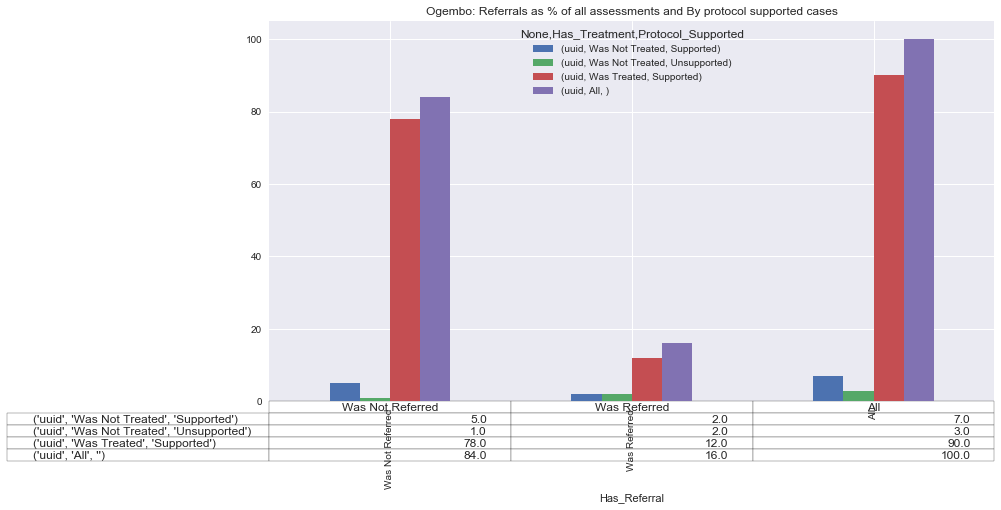

In [7]:
count_assessments = og_dt["Protocol_Supported"].value_counts().sum()
pt = pd.pivot_table( og_dt, index=["Has_Referral", ],
                columns=[ "Has_Treatment","Protocol_Supported"],
               values=["uuid"], 
               aggfunc="count",  margins=True) 
pt
np.round(pt/count_assessments*100).plot( kind="bar", figsize=(13,7), table=True, title="Ogembo: Referrals as % of all assessments and By protocol supported cases")




In [8]:
## 67.1% of U5 referrals got a follow up on time 
#print("\n\n Referrals as per %s dashboard data - \nAssumes referral f/us are as a pct of total assessments: TBC" % TAG_LAST_DATED)
#pd.pivot_table( dash_og_dt, index=["Branch"], 
#               values=["Total Referrals", "On Time Referral f/u Treatment U5"], 
#               aggfunc={ "Total Referrals" : np.nansum,  "On Time Referral f/u Treatment U5": np.nanmean }, 
#                margins=True )  

In [9]:
#print("\n\n1. All Assessment Outcomes")
#pd.pivot_table( og_dt, index=["assessmentoutcome",], columns=["Protocol_Supported"], values=["uuid"],  aggfunc=zCountUnique,  margins=True )


## HIVST Kits Required


- **RQs:** enable HIVST + referral support it

- About 
    - Option 1: All 7,500 Households * 5*0.5 individuals per household participate *2 tests per individual =  37,500 kits required. 
    - Option 2: 6 CUs * 15 CHWs per CU * 100 households per CHW * 5*0.5 participation * 2 tests per individual = 45,000 kits 
    - Option 3: 170 CHWs proposal estimate * 100 households per CHW * 5*.5 participation * 2 tests each = 85,000 kits 

- **Assuming** that
    - Both control and treatment groups get the kits 
    - Each person can test 2 - 3 times during the trial
    - All of Ogembo participates; closed loop expanded to all of Ogembo 

# Appendix

## All KE Data and By Branch Comparison


### Referrals - Nov 2018 Data
- **Most assessments (87.9%) get treated at the community:** Branches with the most referral have at most about 2% of the total assessments each.
- **Most referral activity is within supported protocol cases:** Total countrywide referrals for the period made up 15% of total assessments
    - Treated cases that also got a referral made up 11% of all assessments 
    - Supported cases that were not treated but got a referral were 2% of all assessments.
    - Referrals from unsupported cases were 2% of all assessments, 
    
    - **Ogembo** referrals are 0.9% of all country assessments and about 5.3% of all country assessments. 
        - ogembo has 69 active CHWs (72 as at 26-Mar), which is below the country average of 96 but has pland expansion of 90 - 120 CHWs

In [10]:
print( "\n\n1.a Referral Only As % of All Assessments - Which Branch has most referrals")
#
np.round(pd.pivot_table( ref_og_dt[ ref_og_dt["Has_Referral"]=="Was Referred"], index=[ "Has_Referral","branch", ],
                columns=[ "Has_Treatment","Protocol_Supported"],
                        values=["uuid"], 
               aggfunc="count",  margins=True)/len(ref_og_dt)*100, decimals=1)#.sort_values(by="All")




1.a Referral Only As % of All Assessments - Which Branch has most referrals


uuid                              
Has_Treatment              Was Not Treated             Was Treated   All
Protocol_Supported               Supported Unsupported   Supported      
Has_Referral branch                                                     
Was Referred Busia                     0.2         0.2         1.2   1.6
             Butula                    0.3         0.2         1.4   1.9
             Funyula                   0.1         0.1         0.3   0.5
             Kenyenya                  0.2         0.2         0.5   0.9
             Kuresoi                   0.1         0.1         0.4   0.7
             Malaba                    0.1         0.2         1.0   1.4
             Malava                    0.3         0.3         1.3   1.8
             Nambale                   0.2         0.2         0.8   1.2
             Ogembo                    0.1         0.1         0.7   0.9
             Port Victoria             0.3         0.2         1.0   1.5
             Shinyalu                  0.1         0.2         0.6   0.9
             Suneka                    0.1         0.1         0.9   1.1
             Thika                     0.2         0.1         0.5   0.8
All                                    2.4         2.1        10.6  15.1

In [11]:

print( "\n\n1.b Treatments As % of All Assessments - Which Branch has most referrals")
#
np.round(pd.pivot_table( ref_og_dt, index=[ "Has_Referral","branch", ],
                columns=[ "Has_Treatment","Protocol_Supported"],
               values=["uuid"], 
               aggfunc="count",  margins=True)/len(ref_og_dt)*100, decimals=1)#.sort_values(by="All")



1.b Treatments As % of All Assessments - Which Branch has most referrals


uuid                               
Has_Treatment                  Was Not Treated             Was Treated    All
Protocol_Supported                   Supported Unsupported   Supported       
Has_Referral     branch                                                      
Was Not Referred Busia                     0.3         0.1         7.2    7.6
                 Butula                    0.7         0.1         8.8    9.6
                 Funyula                   0.4         0.2         3.0    3.6
                 Kenyenya                  0.2         0.2         5.0    5.4
                 Kuresoi                   0.1         0.5         3.7    4.3
                 Malaba                    0.4         0.1         9.4    9.9
                 Malava                    0.7         0.3         9.2   10.2
                 Nambale                   0.5         0.3         6.9    7.7
                 Ogembo                    0.3         0.1         4.6    5.0
                 Port Victoria             0.6         0.2         9.2   10.1
                 Shinyalu                  0.3         0.3         4.0    4.6
                 Suneka                    0.2         0.2         5.2    5.6
                 Thika                     0.0         0.2         1.1    1.3
Was Referred     Busia                     0.2         0.2         1.2    1.6
                 Butula                    0.3         0.2         1.4    1.9
                 Funyula                   0.1         0.1         0.3    0.5
                 Kenyenya                  0.2         0.2         0.5    0.9
                 Kuresoi                   0.1         0.1         0.4    0.7
                 Malaba                    0.1         0.2         1.0    1.4
                 Malava                    0.3         0.3         1.3    1.8
                 Nambale                   0.2         0.2         0.8    1.2
                 Ogembo                    0.1         0.1         0.7    0.9
                 Port Victoria             0.3         0.2         1.0    1.5
                 Shinyalu                  0.1         0.2         0.6    0.9
                 Suneka                    0.1         0.1         0.9    1.1
                 Thika                     0.2         0.1         0.5    0.8
All                                        7.2         4.8        87.9  100.0



 2. Number of CHPs and Households with Activity in Nov-2017 


,chpid,patient_id,supervisor
branch,,,
Busia,135.0,4119.0,8.0
Butula,122.0,4834.0,7.0
Funyula,55.0,1670.0,5.0
Kenyenya,108.0,2693.0,6.0
Kuresoi,60.0,2185.0,5.0
Malaba,104.0,4776.0,6.0
Malava,127.0,4933.0,6.0
Nambale,94.0,3773.0,7.0
Ogembo,69.0,2263.0,6.0



 distribution of number of CHWs per branch - Avg.CHWs per Branch = 96


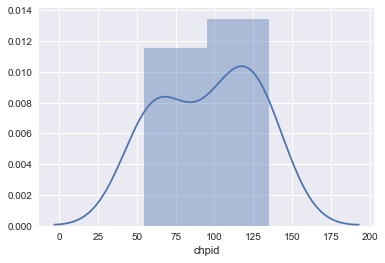

In [12]:
print("\n\n 2. Number of CHPs and Households with Activity in Nov-2017 ")
tp = pd.pivot_table( ref_og_dt, index=["branch",], 
               values=["supervisor","chpid", "patient_id"], 
               aggfunc=zCountUnique,  margins=True ) #( ["# CHWs", "# Households", "# BranchTeam", "#Records"])

tp

#tp["chpid"][:-1].plot( kind="bar")
print("\n distribution of number of CHWs per branch - Avg.CHWs per Branch = %d" % (tp["chpid"][:-1].mean()))
sns.distplot( tp["chpid"][:-1] )
#tp["chpid"][:-1].mean()
#TODO: % referrals and treatments as per dummy variables means